In [1]:
# Import necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Import Dataset

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")

In [5]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [6]:
df.shape

(158, 12)

This dataset contains 158 rows and 12 columns in which 11 columns are input variables and 1 column (Happiness score) is an Output/Target variable. We have to calculate the Happiness score values by comparing all the input variables and how they are effecting.

In [7]:
df.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [8]:
df.tail(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
148,Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
149,Guinea,Sub-Saharan Africa,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [9]:
#Perform EDA

In [10]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In this dataset, there are 3 types of data(int, float and object)

In [11]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [12]:
titles = list(df.columns)

In [13]:
titles

['Country',
 'Region',
 'Happiness Rank',
 'Happiness Score',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

In [14]:
titles[0],titles[3] = titles[3],titles[0]

In [15]:
titles

['Happiness Score',
 'Region',
 'Happiness Rank',
 'Country',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

In [16]:
df = df[titles]
df

,Happiness Score,Region,Happiness Rank,Country,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,Western Europe,1,Switzerland,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,Western Europe,2,Iceland,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,Western Europe,3,Denmark,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,Western Europe,4,Norway,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,North America,5,Canada,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,3.465,Sub-Saharan Africa,154,Rwanda,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,Sub-Saharan Africa,155,Benin,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,Middle East and Northern Africa,156,Syria,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,Sub-Saharan Africa,157,Burundi,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [17]:
#Perform EDA

In [18]:
df.info

<bound method DataFrame.info of      Happiness Score                           Region  Happiness Rank  \
0              7.587                   Western Europe               1   
1              7.561                   Western Europe               2   
2              7.527                   Western Europe               3   
3              7.522                   Western Europe               4   
4              7.427                    North America               5   
..               ...                              ...             ...   
153            3.465               Sub-Saharan Africa             154   
154            3.340               Sub-Saharan Africa             155   
155            3.006  Middle East and Northern Africa             156   
156            2.905               Sub-Saharan Africa             157   
157            2.839               Sub-Saharan Africa             158   

         Country  Standard Error  Economy (GDP per Capita)   Family  \
0    Switzerland    

In [19]:
#Checking for Null values 

df.isnull().sum()

Happiness Score                  0
Region                           0
Happiness Rank                   0
Country                          0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [20]:
#Lets check for unique values 

df['Country'].nunique()

158

In [21]:
df['Region'].nunique()

10

In [22]:
df['Happiness Rank'].nunique()

157

In [23]:
df['Happiness Score'].nunique()

157

In [24]:
df['Standard Error'].nunique()

153

We can see that there are no null values in the data

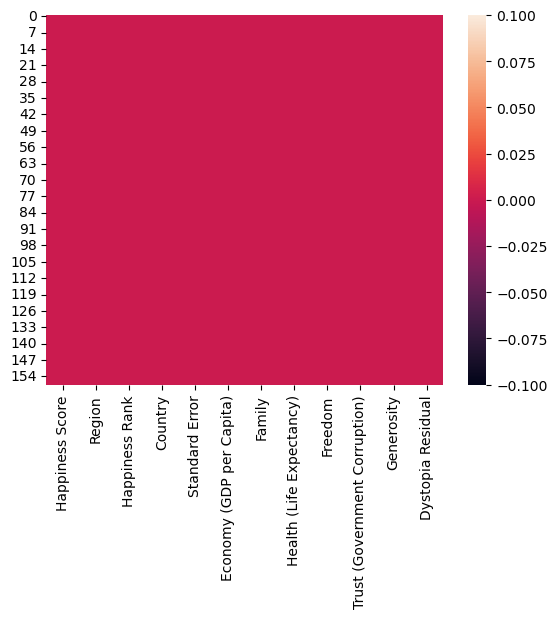

In [25]:
#Lets visulaize using Heatmap and check for the null  values

sns.heatmap(df.isnull())
plt.show()

Here plot also shows that there are no null values in the dataset

In [26]:
df.describe()

,Happiness Score,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,79.493671,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,45.754363,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,1.000000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,40.250000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,79.500000,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,118.750000,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,158.000000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


There may be chances of outliers in all the columns of dataset as there is high gap between 75 percentile and Max values.So, we will visualize the data to check for outliers and remove if anything present.
The above decription also shows the mean, median , max, min, standard deviation values of all the columns.
There may be chances of skewness in some of the columns, so we need to check for skewness and remove if it is not in acceptable range.

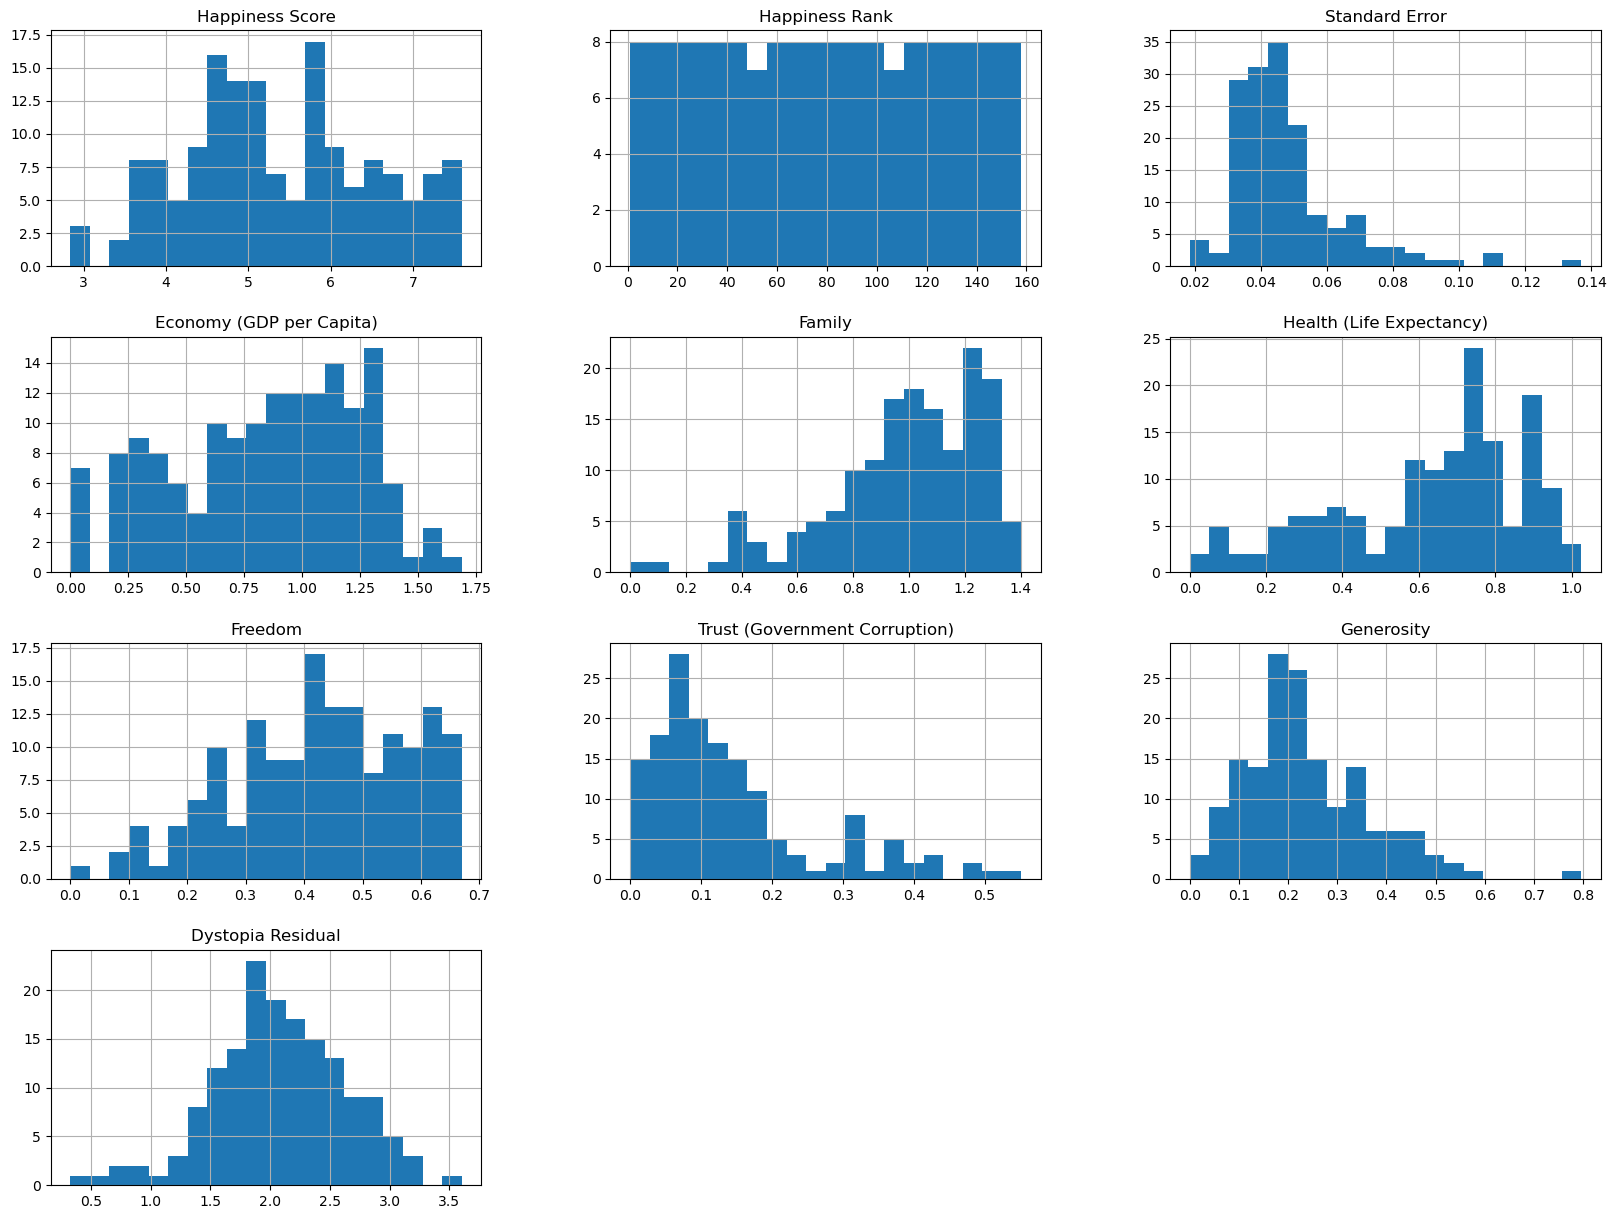

In [27]:
#Count of all numerical columns

df.hist(bins=20,figsize=(20,15))
plt.show()

In [28]:
#Drop column 
df = df.drop(['Country'], axis =1)

In [29]:
df

,Happiness Score,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,Western Europe,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,Western Europe,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,Western Europe,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,Western Europe,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,North America,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,3.465,Sub-Saharan Africa,154,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,Sub-Saharan Africa,155,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,Middle East and Northern Africa,156,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,Sub-Saharan Africa,157,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [30]:
#Encoding Region Column using Label encoder
import sklearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [31]:
df['Region']= le.fit_transform(df['Region'])

In [32]:
df['Region']

0      9
1      9
2      9
3      9
4      5
      ..
153    8
154    8
155    4
156    8
157    8
Name: Region, Length: 158, dtype: int32

In [33]:
df['Region'].nunique()

10

In [67]:
df

,Happiness Score,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,9,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,9,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,9,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,9,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,5,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
152,3.575,7,153,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
153,3.465,8,154,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,8,155,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,4,156,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858


In [34]:
df.dtypes

Happiness Score                  float64
Region                             int32
Happiness Rank                     int64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [35]:
#Checking for numerical columns

numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!= 'object':
        numerical_col.append(i)
print("Numerical columns:", numerical_col)
        

Numerical columns: ['Happiness Score', 'Region', 'Happiness Rank', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']


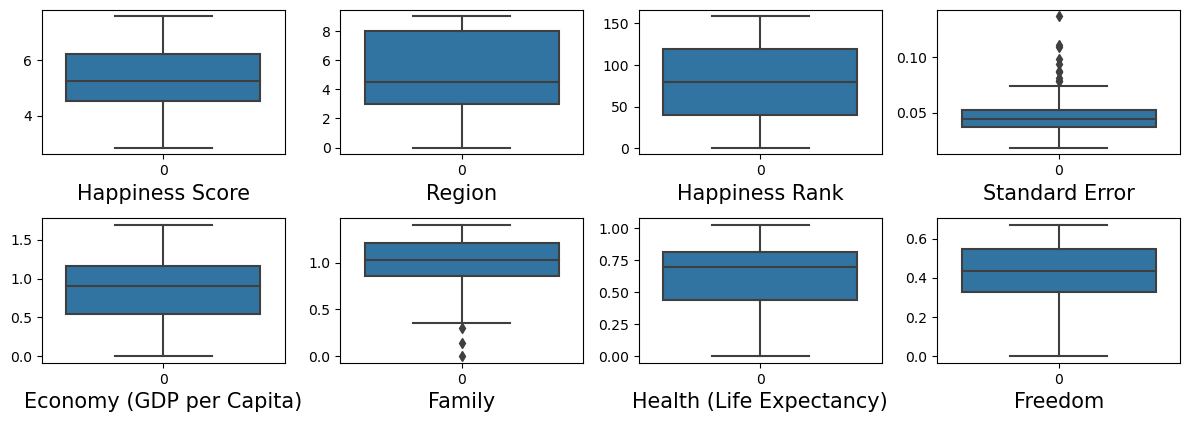

In [36]:
#Checking for outliers

plt.figure(figsize = (12,8), facecolor ='white')
plotnumber = 1
for col in numerical_col:
    if plotnumber<=8:
        ax = plt.subplot(4,4, plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize =15)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In the above plots , we can see that there are outliers in Standard Error and Family column

In [37]:
 #Removing Outliers using zscore 
from scipy.stats import zscore
out_features = df[['Standard Error','Family']]
z =np.abs(zscore(out_features))
z

,Standard Error,Family
0,0.805926,1.320281
1,0.055889,1.514458
2,0.854487,1.361054
3,0.531526,1.251922
4,0.722845,1.221204
...,...,...
153,0.774917,0.800520
154,0.662582,2.346860
155,0.132534,1.901086
156,2.263962,2.118467


In [38]:
np.where(z>3)

(array([ 40,  64, 115, 147, 157], dtype=int64),
 array([0, 0, 0, 1, 1], dtype=int64))

In [39]:
df1 = df[(z<3).all(axis=1)]

In [40]:
df1.shape

(153, 11)

In [41]:
print("First DataFrame -", df.shape[0])
print("New DataFrame -", df1.shape[0])

First DataFrame - 158
New DataFrame - 153


In [42]:
print("Data Loss percentage -",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data Loss percentage - 3.1645569620253164


In [43]:
df=df1

Here dataloss percentage is less than 10%, it is an affordable loss. I will proceed with the loss

In [44]:
#Checking for skewness in data

df.skew()

Happiness Score                  0.132944
Region                          -0.102409
Happiness Rank                   0.001259
Standard Error                   1.230890
Economy (GDP per Capita)        -0.319187
Family                          -0.768488
Health (Life Expectancy)        -0.738687
Freedom                         -0.407548
Trust (Government Corruption)    1.352802
Generosity                       0.991901
Dystopia Residual               -0.219188
dtype: float64

In [45]:
df.corr()

,Happiness Score,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,-0.150981,-0.992674,-0.206377,0.774547,0.731479,0.715521,0.576396,0.404013,0.175384,0.552803
Region,-0.150981,1.000000,0.190149,-0.022848,-0.233955,-0.128269,-0.340371,0.106752,0.168547,0.282728,-0.064330
Happiness Rank,-0.992674,0.190149,1.000000,0.188907,-0.778207,-0.729436,-0.727666,-0.561644,-0.380149,-0.155058,-0.544780
Standard Error,-0.206377,-0.022848,0.188907,1.000000,-0.216017,-0.128977,-0.340741,-0.179787,-0.123132,-0.117156,0.044687
Economy (GDP per Capita),0.774547,-0.233955,-0.778207,-0.216017,1.000000,0.627174,0.810411,0.370089,0.309353,-0.019924,0.060772
Family,0.731479,-0.128269,-0.729436,-0.128977,0.627174,1.000000,0.496608,0.474083,0.211790,0.081565,0.174890
Health (Life Expectancy),0.715521,-0.340371,-0.727666,-0.340741,0.810411,0.496608,1.000000,0.368026,0.242833,0.107688,0.037327
Freedom,0.576396,0.106752,-0.561644,-0.179787,0.370089,0.474083,0.368026,1.000000,0.507876,0.373377,0.062984
Trust (Government Corruption),0.404013,0.168547,-0.380149,-0.123132,0.309353,0.211790,0.242833,0.507876,1.000000,0.281993,-0.021521
Generosity,0.175384,0.282728,-0.155058,-0.117156,-0.019924,0.081565,0.107688,0.373377,0.281993,1.000000,-0.107527


In [48]:
df.shape

(153, 11)

In [49]:
#Splitting the data into x and y

x = df.iloc[:, 1:11].values
y = df.iloc[: ,0].values

In [50]:
x

array([[9.00000e+00, 1.00000e+00, 3.41100e-02, ..., 4.19780e-01,
        2.96780e-01, 2.51738e+00],
       [9.00000e+00, 2.00000e+00, 4.88400e-02, ..., 1.41450e-01,
        4.36300e-01, 2.70201e+00],
       [9.00000e+00, 3.00000e+00, 3.32800e-02, ..., 4.83570e-01,
        3.41390e-01, 2.49204e+00],
       ...,
       [8.00000e+00, 1.55000e+02, 3.65600e-02, ..., 8.01000e-02,
        1.82600e-01, 1.63328e+00],
       [4.00000e+00, 1.56000e+02, 5.01500e-02, ..., 1.89060e-01,
        4.71790e-01, 3.28580e-01],
       [8.00000e+00, 1.57000e+02, 8.65800e-02, ..., 1.00620e-01,
        1.97270e-01, 1.83302e+00]])

In [51]:
y

array([7.587, 7.561, 7.527, 7.522, 7.427, 7.406, 7.378, 7.364, 7.286,
       7.284, 7.278, 7.226, 7.2  , 7.187, 7.119, 6.983, 6.946, 6.94 ,
       6.937, 6.901, 6.867, 6.853, 6.81 , 6.798, 6.786, 6.75 , 6.67 ,
       6.611, 6.575, 6.574, 6.505, 6.485, 6.477, 6.455, 6.411, 6.329,
       6.302, 6.298, 6.295, 6.269, 6.13 , 6.123, 6.003, 5.995, 5.987,
       5.984, 5.975, 5.96 , 5.948, 5.89 , 5.889, 5.878, 5.855, 5.848,
       5.833, 5.828, 5.824, 5.813, 5.791, 5.77 , 5.759, 5.754, 5.716,
       5.695, 5.689, 5.605, 5.589, 5.548, 5.477, 5.474, 5.429, 5.399,
       5.36 , 5.332, 5.286, 5.268, 5.253, 5.212, 5.194, 5.192, 5.192,
       5.14 , 5.129, 5.124, 5.123, 5.102, 5.098, 5.073, 5.057, 5.013,
       5.007, 4.971, 4.959, 4.949, 4.898, 4.885, 4.876, 4.874, 4.867,
       4.857, 4.839, 4.8  , 4.788, 4.786, 4.739, 4.715, 4.694, 4.686,
       4.681, 4.677, 4.642, 4.633, 4.61 , 4.565, 4.55 , 4.518, 4.517,
       4.514, 4.512, 4.507, 4.436, 4.419, 4.369, 4.35 , 4.332, 4.307,
       4.297, 4.292,

In [52]:
#Splitting the data into training and testing

from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size =0.20, random_state =0)

In [53]:
#Scaling the data using Standard Scaler

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [60]:
#Applying ML Models
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators =15, criterion='squared_error', random_state =None)
RFR.fit(x_train,y_train)
predRFR = RFR.predict(x_test)
print("RandomForestRegressor training Accuracy: ", RFR.score(x_train, y_train))


RandomForestRegressor training Accuracy:  0.999245277386325


In [61]:
#Applying ML Models
from sklearn.ensemble import AdaBoostRegressor
ABR = AdaBoostRegressor(estimator =None, random_state =None)
ABR.fit(x_train,y_train)
predABR = ABR.predict(x_test)
print("AdaBoostRegressor training Accuracy: ", ABR.score(x_train, y_train))


AdaBoostRegressor training Accuracy:  0.998253948206168


In [62]:
#Applying ML Models
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=20, random_state =None)
GBR.fit(x_train,y_train)
predGBR = GBR.predict(x_test)
print("GradientBoostingRegressor training Accuracy: ", GBR.score(x_train, y_train))

GradientBoostingRegressor training Accuracy:  0.9833541479639785


Accuracy score of Random Forest Regressor is high compared to other models.

In [63]:
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)


RandomForestRegressor()

In [64]:
predRFR = RFR.predict(x_test)
predRFR

array([6.88256, 3.62815, 5.69138, 4.6548 , 6.95526, 7.51496, 6.11678,
       4.69332, 4.51658, 5.84898, 5.0325 , 4.82191, 5.08266, 3.51828,
       4.67456, 6.27215, 6.59123, 4.544  , 5.41576, 4.28191, 5.83297,
       7.48766, 3.62929, 5.13148, 6.44896, 4.76948, 3.58461, 5.76749,
       4.83725, 5.90923, 7.28352])

In [65]:
#Saving the model

import pickle
filename ='pickleRFRfile.pkl'
pickle.dump(RFR, open(filename,'wb'))

In [66]:
# Loading the model

loaded_model = pickle.load(open(filename,'rb'))
loaded_model.predict(x_test)

array([6.88256, 3.62815, 5.69138, 4.6548 , 6.95526, 7.51496, 6.11678,
       4.69332, 4.51658, 5.84898, 5.0325 , 4.82191, 5.08266, 3.51828,
       4.67456, 6.27215, 6.59123, 4.544  , 5.41576, 4.28191, 5.83297,
       7.48766, 3.62929, 5.13148, 6.44896, 4.76948, 3.58461, 5.76749,
       4.83725, 5.90923, 7.28352])

In [68]:
#As RFR is having good accuracy score. We will do some prediction with rondom values.
import numpy as np
happiness_score  = np.array([9,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738])
happiness_score 


array([9.     , 1.     , 0.03411, 1.39651, 1.34951, 0.94143, 0.66557,
       0.41978, 0.29678, 2.51738])

In [69]:
happiness_score.shape

(10,)

In [70]:
happiness_score = happiness_score.reshape(1, -1)

In [71]:
happiness_score.shape

(1, 10)

In [72]:
predvalue = RFR.predict(happiness_score)
predvalue

array([4.41534])